<img src="https://github.com/sobester/ADRpy/raw/master/docs/ADRpy/ADRpy_splash.png" width="40%" align="left">

*Given a general layout (perhaps one of several candidates at this stage) and some idea of the maximum take-off weight, the next major step of the conceptual design process is the constraint analysis, which will yield the required wing area and thrust - effectively giving 'scale' to the concept.*

*The constraint analysis establishes the boundaries of the feasible part of the thrust to weight ratio (T/W) versus wing loading (W/S) space. Each element of the mission of the aircraft 'bites out' a chunk from this space and the final aeroplane we will progress to the subsequent stages of the design process will have to 'live' in the remaining subspace - generally at the lowest thrust/smallest wing point of the remaining feasible chunk.*

*In this notebook, we investigate the boundary associated with the* **climb constraint.**

# Scaling an aircraft concept with ADRpy - the climb constraint

<img src="https://github.com/sobester/ADRpy/raw/master/docs/ADRpy/img/climb.png" width="45%" align="left">
Simplified sketch of forces acting on an aircraft in the climb (background image of a Lockheed Martin F-22 Raptor courtesy of the US Air Force).

### Fundamental concepts

**Climb angle** $\theta$ - the angle between the horizontal and the tangent to the flightpath of (the centre of gravity of) the aircraft. Positive for climbing flight, negative for descents.

**Climb gradient** - usually expressed in percentage = $100\times\tan\theta$

**Angle of attack** ($\alpha$) - if the airframe reference we use is the wing chord, then this is the angle of attack of the wing (if a fuselage reference is used, then the setting angle of the wing must be taken into account).

**Rate of climb** (RoC) is the vertical component of the true airspeed $V$, so RoC = $V\sin\theta$ = $\frac{\mathrm{d}h}{\mathrm{d}t}$.

**The inertial effect of density lapse** If the aircraft climbs at a constant indicated airspeed (or constant calibrated airspeed, in practice), its true airspeed (which is what matters from the point of view of the acceleration term in Newton's second law) will increase as the ambient density drops along its ascending path [example from *Jet Transport Performance Models (Boeing)*: over the first 1000 feet of a climb at sea level 150KIAS, the true airspeed will have increased by 4KTAS]. The resulting inertial term can be written, in the direction of the airspeed vector V, as:

$$ma = \frac{W}{g}\frac {\mathrm{d}V}  {\mathrm{d}t}$$

where $m$ and $W$ are the mass and weight of the aircraft respectively.

**The inertial effect of angle of climb variation** Along with the true airspeed, in the most general case, the angle of climb $\theta$ may vary during the climb too. In other words, the direction of the true velocity vector $\overrightarrow{V}$, along which we considered the inertial term above, may itself, be changing. This turns the trajectory into a curve. Approximating this curve as a circular arc, we can think of the force changing the climb gradient as a centripetal force $mr\omega^2$, where $\omega$ is the angular velocity, which is also the rate of change of the angle of the tangent to the trajectory, so $\omega = \mathrm{d}\theta / \mathrm{d}t$. Since the true airspeed $V=r\omega$, the centripetal force can be written as:

$$mV\omega = \frac{W}{g}V\frac{\mathrm{d}\theta}{\mathrm{d}t}$$

### T/W required for sustaining a given rate of climb

#### Perpendicular to the flight path

Projecting $F = ma$ onto the $z$ axis (perpendicular to the flight path):

$$\underbrace{L-W\cos{\theta}+T\sin\alpha}_{\textbf{z-components of lift, weight and thrust}} = \overbrace{-\frac{W}{g}V\frac {\mathrm{d}\theta}{\mathrm{d}t}}^{\textbf{mass}\,\times\,\textbf{acc. due to climb angle change}} $$

A possible shortcut at this stage, if a 'clean' analytical solution is desired, is that, since for the angles of attack $\alpha$ typical of a steady state climb $\sin\alpha <0.1$, we drop the $\sin$ term altogether:

$$L-W\cos{\theta} = -\frac{W}{g}V\frac {\mathrm{d}\theta}{\mathrm{d}t}$$

Further, if we assume that the time derivative of the climb angle is negligible (so the right hand side of the equation above is zero), the lift equation can be written as:

$$L = W\cos\theta = qSC_\mathrm{L}.$$

Assuming a parabolic drag polar, we write the total drag as:

$$D = qS\left[C_{\mathrm{D}\mathrm{min}}+C_\mathrm{ind}\right] = qS\left[C_{\mathrm{D}\mathrm{min}}+kC_\mathrm{L}^2\right]$$

and we insert the lift coefficient from the $z$ component climb equation derived above: 

$$D = qS\left[C_{\mathrm{D}\mathrm{min}}+k\left(\frac{W \cos\,\theta}{qS}\right)^2\right]= \\=qSC_{\mathrm{D}\mathrm{min}} +k\frac{W^2 \cos^2\theta}{qS}\\= qSC_{\mathrm{D}\mathrm{min}} +\frac{k}{q}\left(\frac{W}{S}\right)W \cos^2\theta$$

#### Along the flight path

Projecting the climb forces onto the $x$ (trajectory tangent) axis:

$$-D-W\sin\theta+T=\overbrace{\frac{W}{g}\frac{\mathrm{d}V}{\mathrm{d}t}}^{\textbf{mass}\,\times\,\textbf{acc. due to true airspeed change}}$$

Dividing each side by $W$ we obtain:

$$\frac{1}{W}\left( -D-W\sin\theta+T  \right)=\frac{1}{g}\frac{\mathrm{d}V}{\mathrm{d}t}$$

We can express the sine of the climb angle from here:

$$\sin\theta = \frac{T}{W}-\frac{D}{W} - \frac{1}{g}\frac{\mathrm{d}V}{\mathrm{d}t}.$$

We rewrite the vertical acceleration term, using the chain rule, as: 

$$\frac{\mathrm{d}V}{\mathrm{d}t} = \frac{\mathrm{d}V}{\mathrm{d}h} \frac{\mathrm{d}h}{\mathrm{d}t}$$

where $h$ is the geopotential altitude. The climb rate $\frac{\mathrm{d}h}{\mathrm{d}t} = V\sin\theta$ and thus

$$\sin\theta = \frac{T}{W}-\frac{D}{W} - \frac{1}{g}\frac{\mathrm{d}V}{\mathrm{d}h}V\sin\theta.$$

Rearranging, we obtain:

$$\sin\theta\left(1+ \frac{V}{g}\frac{\mathrm{d}V}{\mathrm{d}h}\right) = \frac{T}{W}-\frac{D}{W} $$

Inserting the drag expression derived above:

$$\sin\theta\left(1+ \frac{V}{g}\frac{\mathrm{d}V}{\mathrm{d}h}\right) = \frac{T}{W}-\frac{qSC_{\mathrm{D}\mathrm{min}} +\frac{k}{q}\left(\frac{W}{S}\right)W\cos^2\theta}{W}$$

$$\sin\theta\left(1+ \frac{V}{g}\frac{\mathrm{d}V}{\mathrm{d}h}\right)   = \frac{T}{W}-\frac{qC_\mathrm{Dmin}}{\left(W/S\right)} -\frac{k}{q}\left(\frac{W}{S}\right)\cos^2\theta$$

The second term on the left-hand side of the equation is sometimes referred to as the *acceleration factor*:

$$K_\mathrm{a} = 1+ \frac{V}{g}\frac{\mathrm{d}V}{\mathrm{d}h}$$

Thus:

$$K_\mathrm{a}\sin\theta = \frac{T}{W}-\frac{qC_\mathrm{Dmin}}{\left(W/S\right)} -\frac{k}{q}\left(\frac{W}{S}\right)\cos^2\theta$$

and from here the thrust to weight ratio required can be expressed as:

$$\frac{T}{W} = \frac{qC_\mathrm{Dmin}}{\left(W/S\right)}+ \frac{k}{q}\left(\frac{W}{S}\right)\cos^2\theta + K_\mathrm{a}\sin\theta$$

or, in terms of the rate of climb RoC (= $V\sin\theta$):

$$\frac{T}{W} = \frac{qC_\mathrm{Dmin}}{\left(W/S\right)}+ \frac{k}{q}\left(\frac{W}{S}\right)\cos^2\theta + K_\mathrm{a}\frac{\mathrm{RoC}}{V}$$

For a rapid, first order estimate, we could assume a shallow climb, that is, $\cos^2\theta\approx1$ and $\mathrm{d}V/\mathrm{d}h\approx0$, so $K_a=1$, in which case:

$$\frac{T}{W} \approx \frac{qC_\mathrm{Dmin}}{\left(W/S\right)}+ \frac{k}{q}\left(\frac{W}{S}\right) + \frac{\mathrm{RoC}}{V}$$

Returning to the full equation, since $\cos^2\theta = 1 - \sin^2\theta = 1 - \left(\frac{\mathrm{RoC}}{V}\right)^2$, we can write:

$$\frac{T}{W} = \frac{qC_\mathrm{Dmin}}{\left(W/S\right)}+ \frac{k}{q}\left(\frac{W}{S}\right)\left[1 - \left(\frac{\mathrm{RoC}}{V}\right)^2\right] + K_\mathrm{a}\frac{\mathrm{RoC}}{V}$$

There are two tricky-to-estimate items here. One is $C_\mathrm{Dmin}$, the zero lift drag in the climb configuration (we shall assume here that this is the clean configuration, that is gears up and high lift devices up). The other is $V$, the climb speed. Technically this should be the best rate of climb speed, but at this point in the design process we don't really know that. For both we therefore need to look at historical data, if available, and use suitable error margins around our estimated values. Also, for an initial climb constraint the typical sub-10,000 feet speed limit (introduced for air traffic management reasons) of 250 knots should be seen as an upper limit to $V$. 

### An example - climb performance of a business jet

Let us consider the climb requirements of the business jet discussed in the take-off constraint notebook. In the climb section of the design brief we shall specify the required rate of climb, the climb speed and the altitude at which we would like this requirement to be satisfied. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ADRpy import unitconversions as co
from ADRpy import constraintanalysis as ca
from ADRpy import atmospheres as at

In [2]:
designbrief = {'climbalt_m': 1000, 'climbspeed_kias': 250, 'climbrate_fpm': 1000, \
               'cruisealt_m': 15000, 'cruisespeed_ktas': 445}
designdefinition = {'aspectratio':7.3, 'sweep_le_deg':10, 'sweep_mt_deg':8, 'bpr':3.9, 'tr':1.05} 
designperformance = {'CDTO':0.04, 'CLTO':0.9, 'CLmaxTO':1.6, 'mu_R':0.02, 'CDminclean':0.02}

designatm = at.Atmosphere()

concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)

In [3]:
wingloadinglist_pa = np.arange(2000, 5000, 10)

In [4]:
twratio = concept.twrequired_clm(wingloadinglist_pa)

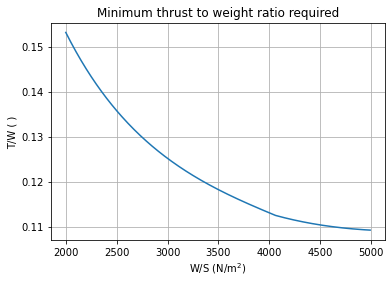

In [5]:
plt.plot(wingloadinglist_pa, twratio)
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required")
plt.grid(True)
plt.show()

### Quantifying uncertainties in climb calculations

We shall follow the uncertainty quantification approach introduced in the take-off constraint notebook. Each iteration of the following loop draws a different random value (from a suitable distribution) to be assigned to elements of the design, one performance estimate (zero lift drag) and one environmental variable (the ISA offset). We leave the design brief fixed.

In [6]:
designbrief = {'rwyelevation_m':1000, 'groundrun_m':1200, \
               'stloadfactor': 2, 'turnalt_m': 5000, 'turnspeed_ktas': 300, \
               'climbalt_m': 1000, 'climbspeed_kias': 250, 'climbrate_fpm': 1000, \
               'cruisealt_m': 15000, 'cruisespeed_ktas': 445}

twmatrix = []
wingloadinglist_pa = np.arange(2000, 5000, 10)
mc_samplesize = 5000

for i in range(1, mc_samplesize):

    ar = np.random.uniform(6.5, 9)
    bpr = max(5, np.random.normal(8, 1))
    tr = np.random.uniform(1.04, 1.08)

    sle_deg = np.random.normal(17, 3)
    smt_deg = sle_deg - np.random.normal(7, 3)
    
    offs_deg = np.random.normal(15, 15)
    
    cdmin = np.random.normal(0.02, 0.002)
    
    designdefinition = {'aspectratio':ar, 'sweep_le_deg':sle_deg, 'sweep_mt_deg':smt_deg, 'bpr':bpr, 'tr':tr} 
    designperformance = {'CDminclean':cdmin}
    designatm = at.Atmosphere(offset_deg=offs_deg, profile=None)

    concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm)
    tw_sl = concept.twrequired_clm(wingloadinglist_pa)
    
    if np.size(twmatrix) > 0:
        twmatrix = np.vstack((twmatrix,tw_sl))
    else:
        twmatrix = tw_sl

We can now use the stack of required T/W vectors to calculate feasible percentiles on each:

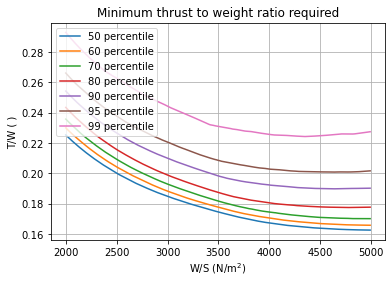

In [7]:
for feasible_percentile in [50, 60, 70, 80, 90, 95, 99]:
    percentile_tw = np.percentile(twmatrix, feasible_percentile, axis=0)
    plt.plot(wingloadinglist_pa, percentile_tw, label = str(feasible_percentile)+' percentile')

legend = plt.legend(loc='upper left')
plt.ylabel("T/W ( )")
plt.xlabel("W/S (N/m$^2$)")
plt.title("Minimum thrust to weight ratio required")
plt.grid(True)
plt.show()